In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

In [2]:
# 1. 读取数据
data = pd.read_excel('/Users/luchong/Desktop/AI-Competition/datetime/dataset20231023-1.xlsx')
data.head()

,DateTime,tag,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,time_idx,ID_mask
0,2023-02-07 09:50:00,1,529.9,530.2,530.4,529.4,48231,27999,522.0,6.341414,6.502994,1,2,38,9,50,0,False
1,2023-02-07 10:00:00,1,529.7,530.0,530.7,529.6,49170,27884,522.0,5.546019,5.859928,1,2,38,10,0,1,False
2,2023-02-07 10:10:00,1,530.0,530.5,530.6,529.8,49445,27792,522.0,4.568553,6.630133,1,2,38,10,10,2,False
3,2023-02-07 10:30:00,1,530.6,529.8,530.9,529.3,50148,27653,522.0,4.894341,4.740474,1,2,38,10,30,4,False
4,2023-02-07 10:40:00,1,529.8,529.6,530.3,529.5,50547,27554,522.0,5.314777,4.737040,1,2,38,10,40,5,False


In [3]:
p2_values=data['p2'].values
p1_values=data['p1'].values
p3_values=data['p3'].values
p4_values=data['p4'].values
p7_values=data['p7'].values
data['p2_change']=0
for i in range(1,len(p2_values)):
    if p2_values[i]>=p2_values[i-1]:
        data.at[i,'p2_change'] =1 #上升或不变置1
    else:
        data.at[i,'p2_change'] =0 #下降置0

data['p1_change']=0
for i in range(1,len(p1_values)):
    if p1_values[i]>=p1_values[i-1]:
        data.at[i,'p1_change'] =1 #上升或不变置1
    else:
        data.at[i,'p1_change'] =0 #下降置0
        
data['p3_change']=0
for i in range(1,len(p3_values)):
    if p3_values[i]>=p3_values[i-1]:
        data.at[i,'p3_change'] =1 #上升或不变置1
    else:
        data.at[i,'p3_change'] =0 #下降置0
        
data['p4_change']=0
for i in range(1,len(p4_values)):
    if p4_values[i]>=p4_values[i-1]:
        data.at[i,'p4_change'] =1 #上升或不变置1
    else:
        data.at[i,'p4_change'] =0 #下降置0
        
data['p7_change']=0
for i in range(1,len(p7_values)):
    if p7_values[i]>=p7_values[i-1]:
        data.at[i,'p7_change'] =1 #上升或不变置1
    else:
        data.at[i,'p7_change'] =0 #下降置0
data.head()   

,DateTime,tag,p1,p2,p3,p4,p5,p6,p7,p8,...,p12,p13,p14,time_idx,ID_mask,p2_change,p1_change,p3_change,p4_change,p7_change
0,2023-02-07 09:50:00,1,529.9,530.2,530.4,529.4,48231,27999,522.0,6.341414,...,38,9,50,0,False,0,0,0,0,0
1,2023-02-07 10:00:00,1,529.7,530.0,530.7,529.6,49170,27884,522.0,5.546019,...,38,10,0,1,False,0,0,1,1,1
2,2023-02-07 10:10:00,1,530.0,530.5,530.6,529.8,49445,27792,522.0,4.568553,...,38,10,10,2,False,1,1,0,1,1
3,2023-02-07 10:30:00,1,530.6,529.8,530.9,529.3,50148,27653,522.0,4.894341,...,38,10,30,4,False,0,1,1,0,1
4,2023-02-07 10:40:00,1,529.8,529.6,530.3,529.5,50547,27554,522.0,5.314777,...,38,10,40,5,False,0,0,0,1,1


In [6]:
# 2. 划分数据
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
train_data, val_data = train_test_split(train_data, test_size=0.2, shuffle=False)

train_data长度= 7979 test_data长度= 1995
再次划分后train_data长度= 6383
val_data长度= 1596


In [7]:
# 3. 创建训练数据集和数据加载器
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    relevant_columns = ['p2_change','p1_change','p3_change','p4_change','p7_change']
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i+sequence_length][relevant_columns].values.astype(np.float32)
        label = data.iloc[i+sequence_length][relevant_columns].values.astype(np.float32)
        sequences.append(sequence)
        labels.append(label)
    return torch.tensor(sequences), torch.tensor(labels)

In [8]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
sequence_length = 5 
X_train, y_train = create_sequences(train_data, sequence_length)
print('X_train长度=',len(X_train),'y_train长度=',len(y_train))
X_test, y_test = create_sequences(test_data, sequence_length)
print('X_test长度=',len(X_test),'y_test长度=',len(y_test))
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test,y_test)
batch_size = 32  
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

/var/folders/hv/fdqcv9m93zz8vd7kq6l72rxc0000gn/T/ipykernel_11748/1120046330.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  return torch.tensor(sequences), torch.tensor(labels)


X_train长度= 6378 y_train长度= 6378
X_test长度= 1990 y_test长度= 1990


In [9]:
# 5. 创建LSTM模型
import torch.nn as nn
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, sequence_length,num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Sequential(nn.Linear(hidden_size, output_size),nn.Sigmoid())
        self.sequence_length = sequence_length

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out)  # 获取最后一个时间步的输出
        return out

In [10]:
input_size = 5  # 特征数
hidden_size = 50
output_size = 1  
num_layers=2

model = LSTMModel(input_size, hidden_size, output_size, sequence_length,num_layers)

In [12]:
# 6. 定义损失函数和优化器
import torch.optim as optim
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# 7. 训练模型
num_epochs = 100  # 调整训练轮数
print_every = 5  # 每5步打印一次损失
train_loss=[]
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # 模型接受整个时间序列的输入
        outputs = model(inputs)
        # 检查输出和标签的维度
        loss = criterion(outputs[:,-1,:], labels[:,1:2]) 

        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        running_loss += loss.item()
        if (i + 1) % print_every == 0:
            print(f"Epoch [{epoch + 1}, Step {i + 1}] Loss: {running_loss / print_every}")
            running_loss = 0.0

Epoch [1, Step 5] Loss: 0.6888100147247315
Epoch [1, Step 10] Loss: 0.6724624514579773
Epoch [1, Step 15] Loss: 0.6846752405166626
Epoch [1, Step 20] Loss: 0.7044666290283204
Epoch [1, Step 25] Loss: 0.6705966353416443
Epoch [1, Step 30] Loss: 0.6716277837753296
Epoch [1, Step 35] Loss: 0.6713476657867432
Epoch [1, Step 40] Loss: 0.6702653050422669
Epoch [1, Step 45] Loss: 0.6593924641609192
Epoch [1, Step 50] Loss: 0.6819519400596619
Epoch [1, Step 55] Loss: 0.6709932565689087
Epoch [1, Step 60] Loss: 0.6616244912147522
Epoch [1, Step 65] Loss: 0.6442409634590149
Epoch [1, Step 70] Loss: 0.6465998291969299
Epoch [1, Step 75] Loss: 0.6376152992248535
Epoch [1, Step 80] Loss: 0.6419668078422547
Epoch [1, Step 85] Loss: 0.6234245538711548
Epoch [1, Step 90] Loss: 0.6161306500434875
Epoch [1, Step 95] Loss: 0.5819511771202087
Epoch [1, Step 100] Loss: 0.5935155868530273
Epoch [1, Step 105] Loss: 0.5742413640022278
Epoch [1, Step 110] Loss: 0.5734225034713745
Epoch [1, Step 115] Loss: 0.53

Epoch [5, Step 185] Loss: 0.21400560736656188
Epoch [5, Step 190] Loss: 0.2622218161821365
Epoch [5, Step 195] Loss: 0.2596321105957031
Epoch [5, Step 200] Loss: 0.2711039274930954
Epoch [6, Step 5] Loss: 0.19118278920650483
Epoch [6, Step 10] Loss: 0.37017214894294737
Epoch [6, Step 15] Loss: 0.2832111448049545
Epoch [6, Step 20] Loss: 0.31368014216423035
Epoch [6, Step 25] Loss: 0.25474431812763215
Epoch [6, Step 30] Loss: 0.19998776614665986
Epoch [6, Step 35] Loss: 0.2599874049425125
Epoch [6, Step 40] Loss: 0.3534197837114334
Epoch [6, Step 45] Loss: 0.32923778891563416
Epoch [6, Step 50] Loss: 0.26659882068634033
Epoch [6, Step 55] Loss: 0.29888386130332945
Epoch [6, Step 60] Loss: 0.18647359758615495
Epoch [6, Step 65] Loss: 0.2520207017660141
Epoch [6, Step 70] Loss: 0.1570372387766838
Epoch [6, Step 75] Loss: 0.22322301864624022
Epoch [6, Step 80] Loss: 0.3105298072099686
Epoch [6, Step 85] Loss: 0.2432972803711891
Epoch [6, Step 90] Loss: 0.2634740337729454
Epoch [6, Step 95]

Epoch [10, Step 140] Loss: 0.2950480252504349
Epoch [10, Step 145] Loss: 0.23352729082107543
Epoch [10, Step 150] Loss: 0.2230113297700882
Epoch [10, Step 155] Loss: 0.2585481867194176
Epoch [10, Step 160] Loss: 0.30895637571811674
Epoch [10, Step 165] Loss: 0.314615273475647
Epoch [10, Step 170] Loss: 0.3005193114280701
Epoch [10, Step 175] Loss: 0.3171935319900513
Epoch [10, Step 180] Loss: 0.35169958472251894
Epoch [10, Step 185] Loss: 0.30367801785469056
Epoch [10, Step 190] Loss: 0.28830550611019135
Epoch [10, Step 195] Loss: 0.23398434221744538
Epoch [10, Step 200] Loss: 0.1924113944172859
Epoch [11, Step 5] Loss: 0.2652170270681381
Epoch [11, Step 10] Loss: 0.23022783547639847
Epoch [11, Step 15] Loss: 0.24574510157108306
Epoch [11, Step 20] Loss: 0.21378390938043595
Epoch [11, Step 25] Loss: 0.29406173527240753
Epoch [11, Step 30] Loss: 0.3604508101940155
Epoch [11, Step 35] Loss: 0.2824487596750259
Epoch [11, Step 40] Loss: 0.2730430096387863
Epoch [11, Step 45] Loss: 0.253907

Epoch [15, Step 45] Loss: 0.1764293059706688
Epoch [15, Step 50] Loss: 0.33365698158741
Epoch [15, Step 55] Loss: 0.20180182605981828
Epoch [15, Step 60] Loss: 0.3110043168067932
Epoch [15, Step 65] Loss: 0.23634074330329896
Epoch [15, Step 70] Loss: 0.29253158569335935
Epoch [15, Step 75] Loss: 0.2933712273836136
Epoch [15, Step 80] Loss: 0.2734424501657486
Epoch [15, Step 85] Loss: 0.2677690386772156
Epoch [15, Step 90] Loss: 0.2536502376198769
Epoch [15, Step 95] Loss: 0.2743949145078659
Epoch [15, Step 100] Loss: 0.3073939234018326
Epoch [15, Step 105] Loss: 0.3391900897026062
Epoch [15, Step 110] Loss: 0.2909062772989273
Epoch [15, Step 115] Loss: 0.2595886930823326
Epoch [15, Step 120] Loss: 0.25388998687267306
Epoch [15, Step 125] Loss: 0.22111088931560516
Epoch [15, Step 130] Loss: 0.18348815739154817
Epoch [15, Step 135] Loss: 0.185870261490345
Epoch [15, Step 140] Loss: 0.2771875858306885
Epoch [15, Step 145] Loss: 0.3118868410587311
Epoch [15, Step 150] Loss: 0.2991129040718

Epoch [20, Step 25] Loss: 0.3066860556602478
Epoch [20, Step 30] Loss: 0.26459669768810273
Epoch [20, Step 35] Loss: 0.3046791195869446
Epoch [20, Step 40] Loss: 0.20926205515861512
Epoch [20, Step 45] Loss: 0.19733494371175767
Epoch [20, Step 50] Loss: 0.28180370926856996
Epoch [20, Step 55] Loss: 0.23636403381824495
Epoch [20, Step 60] Loss: 0.2287244141101837
Epoch [20, Step 65] Loss: 0.2619964897632599
Epoch [20, Step 70] Loss: 0.22240351289510726
Epoch [20, Step 75] Loss: 0.2636052370071411
Epoch [20, Step 80] Loss: 0.317396005988121
Epoch [20, Step 85] Loss: 0.24988445341587068
Epoch [20, Step 90] Loss: 0.30045731365680695
Epoch [20, Step 95] Loss: 0.22117996513843535
Epoch [20, Step 100] Loss: 0.2912806659936905
Epoch [20, Step 105] Loss: 0.21618975698947906
Epoch [20, Step 110] Loss: 0.20935772061347963
Epoch [20, Step 115] Loss: 0.32298681139945984
Epoch [20, Step 120] Loss: 0.23944903910160065
Epoch [20, Step 125] Loss: 0.3456175744533539
Epoch [20, Step 130] Loss: 0.33408387

Epoch [25, Step 15] Loss: 0.23471604883670807
Epoch [25, Step 20] Loss: 0.2932503491640091
Epoch [25, Step 25] Loss: 0.2567682027816772
Epoch [25, Step 30] Loss: 0.2388049066066742
Epoch [25, Step 35] Loss: 0.28507332503795624
Epoch [25, Step 40] Loss: 0.21034565567970276
Epoch [25, Step 45] Loss: 0.31418349742889407
Epoch [25, Step 50] Loss: 0.3148378670215607
Epoch [25, Step 55] Loss: 0.2942992657423019
Epoch [25, Step 60] Loss: 0.24642688333988189
Epoch [25, Step 65] Loss: 0.23452576994895935
Epoch [25, Step 70] Loss: 0.307429039478302
Epoch [25, Step 75] Loss: 0.3223397970199585
Epoch [25, Step 80] Loss: 0.30291412174701693
Epoch [25, Step 85] Loss: 0.1753426283597946
Epoch [25, Step 90] Loss: 0.20338749438524245
Epoch [25, Step 95] Loss: 0.3204514503479004
Epoch [25, Step 100] Loss: 0.2695053979754448
Epoch [25, Step 105] Loss: 0.25111420154571534
Epoch [25, Step 110] Loss: 0.27868521511554717
Epoch [25, Step 115] Loss: 0.2540594220161438
Epoch [25, Step 120] Loss: 0.2291712775826

Epoch [29, Step 180] Loss: 0.1936584085226059
Epoch [29, Step 185] Loss: 0.20644457191228865
Epoch [29, Step 190] Loss: 0.28570028245449064
Epoch [29, Step 195] Loss: 0.26629014909267423
Epoch [29, Step 200] Loss: 0.21335165947675705
Epoch [30, Step 5] Loss: 0.26544080674648285
Epoch [30, Step 10] Loss: 0.27887764275074006
Epoch [30, Step 15] Loss: 0.24885134994983674
Epoch [30, Step 20] Loss: 0.23464029431343078
Epoch [30, Step 25] Loss: 0.1815144181251526
Epoch [30, Step 30] Loss: 0.24245167672634124
Epoch [30, Step 35] Loss: 0.22303398251533507
Epoch [30, Step 40] Loss: 0.2700886011123657
Epoch [30, Step 45] Loss: 0.24538675248622893
Epoch [30, Step 50] Loss: 0.26349187791347506
Epoch [30, Step 55] Loss: 0.2577260032296181
Epoch [30, Step 60] Loss: 0.272341750562191
Epoch [30, Step 65] Loss: 0.2683470219373703
Epoch [30, Step 70] Loss: 0.3021431565284729
Epoch [30, Step 75] Loss: 0.20767905414104462
Epoch [30, Step 80] Loss: 0.30776659697294234
Epoch [30, Step 85] Loss: 0.3567732483

Epoch [34, Step 150] Loss: 0.23404863029718398
Epoch [34, Step 155] Loss: 0.34611188173294066
Epoch [34, Step 160] Loss: 0.15853288471698762
Epoch [34, Step 165] Loss: 0.1953089028596878
Epoch [34, Step 170] Loss: 0.3171310693025589
Epoch [34, Step 175] Loss: 0.3381670206785202
Epoch [34, Step 180] Loss: 0.1854626268148422
Epoch [34, Step 185] Loss: 0.316712349653244
Epoch [34, Step 190] Loss: 0.2935189753770828
Epoch [34, Step 195] Loss: 0.2510738641023636
Epoch [34, Step 200] Loss: 0.2016677275300026
Epoch [35, Step 5] Loss: 0.1991696298122406
Epoch [35, Step 10] Loss: 0.2848636269569397
Epoch [35, Step 15] Loss: 0.25670718848705293
Epoch [35, Step 20] Loss: 0.2743932992219925
Epoch [35, Step 25] Loss: 0.28179305493831636
Epoch [35, Step 30] Loss: 0.25523921847343445
Epoch [35, Step 35] Loss: 0.2201562285423279
Epoch [35, Step 40] Loss: 0.2386924833059311
Epoch [35, Step 45] Loss: 0.22229767739772796
Epoch [35, Step 50] Loss: 0.32641862630844115
Epoch [35, Step 55] Loss: 0.1833169192

Epoch [39, Step 90] Loss: 0.28079423010349275
Epoch [39, Step 95] Loss: 0.3584248602390289
Epoch [39, Step 100] Loss: 0.27547487020492556
Epoch [39, Step 105] Loss: 0.25224995613098145
Epoch [39, Step 110] Loss: 0.22945864200592042
Epoch [39, Step 115] Loss: 0.2703047230839729
Epoch [39, Step 120] Loss: 0.26259697675704957
Epoch [39, Step 125] Loss: 0.23980207592248917
Epoch [39, Step 130] Loss: 0.30612215399742126
Epoch [39, Step 135] Loss: 0.3695616155862808
Epoch [39, Step 140] Loss: 0.23692166209220886
Epoch [39, Step 145] Loss: 0.18911176919937134
Epoch [39, Step 150] Loss: 0.2709191232919693
Epoch [39, Step 155] Loss: 0.213959439098835
Epoch [39, Step 160] Loss: 0.2601140558719635
Epoch [39, Step 165] Loss: 0.24801705181598663
Epoch [39, Step 170] Loss: 0.24810081273317336
Epoch [39, Step 175] Loss: 0.3328163981437683
Epoch [39, Step 180] Loss: 0.20755291730165482
Epoch [39, Step 185] Loss: 0.23031631410121917
Epoch [39, Step 190] Loss: 0.26494907438755033
Epoch [39, Step 195] Lo

Epoch [43, Step 190] Loss: 0.2450287476181984
Epoch [43, Step 195] Loss: 0.22847083657979966
Epoch [43, Step 200] Loss: 0.378434619307518
Epoch [44, Step 5] Loss: 0.18372081518173217
Epoch [44, Step 10] Loss: 0.24766750931739806
Epoch [44, Step 15] Loss: 0.20883153676986693
Epoch [44, Step 20] Loss: 0.23130783140659333
Epoch [44, Step 25] Loss: 0.25609953701496124
Epoch [44, Step 30] Loss: 0.21932444870471954
Epoch [44, Step 35] Loss: 0.23530057668685914
Epoch [44, Step 40] Loss: 0.19887946546077728
Epoch [44, Step 45] Loss: 0.25394253730773925
Epoch [44, Step 50] Loss: 0.2582045286893845
Epoch [44, Step 55] Loss: 0.23285241425037384
Epoch [44, Step 60] Loss: 0.21564569175243378
Epoch [44, Step 65] Loss: 0.2777357444167137
Epoch [44, Step 70] Loss: 0.4536541223526001
Epoch [44, Step 75] Loss: 0.2936889111995697
Epoch [44, Step 80] Loss: 0.2411416381597519
Epoch [44, Step 85] Loss: 0.21488139629364014
Epoch [44, Step 90] Loss: 0.18533230125904082
Epoch [44, Step 95] Loss: 0.230741770565

Epoch [48, Step 160] Loss: 0.1912778928875923
Epoch [48, Step 165] Loss: 0.2581284433603287
Epoch [48, Step 170] Loss: 0.19212774336338043
Epoch [48, Step 175] Loss: 0.2707191914319992
Epoch [48, Step 180] Loss: 0.2741753548383713
Epoch [48, Step 185] Loss: 0.281506085395813
Epoch [48, Step 190] Loss: 0.1286504879593849
Epoch [48, Step 195] Loss: 0.33187790513038634
Epoch [48, Step 200] Loss: 0.2713960915803909
Epoch [49, Step 5] Loss: 0.20462549328804017
Epoch [49, Step 10] Loss: 0.27793932557106016
Epoch [49, Step 15] Loss: 0.2376886084675789
Epoch [49, Step 20] Loss: 0.27752922773361205
Epoch [49, Step 25] Loss: 0.36028664410114286
Epoch [49, Step 30] Loss: 0.2652091532945633
Epoch [49, Step 35] Loss: 0.1765713170170784
Epoch [49, Step 40] Loss: 0.19938177466392518
Epoch [49, Step 45] Loss: 0.2462358921766281
Epoch [49, Step 50] Loss: 0.29123409390449523
Epoch [49, Step 55] Loss: 0.28708835542201994
Epoch [49, Step 60] Loss: 0.24768921136856079
Epoch [49, Step 65] Loss: 0.2806839644

Epoch [53, Step 115] Loss: 0.24009324461221696
Epoch [53, Step 120] Loss: 0.28264460563659666
Epoch [53, Step 125] Loss: 0.2200727015733719
Epoch [53, Step 130] Loss: 0.30560373663902285
Epoch [53, Step 135] Loss: 0.26482931077480315
Epoch [53, Step 140] Loss: 0.2740076959133148
Epoch [53, Step 145] Loss: 0.2600797563791275
Epoch [53, Step 150] Loss: 0.27814776003360747
Epoch [53, Step 155] Loss: 0.23910480737686157
Epoch [53, Step 160] Loss: 0.2605777531862259
Epoch [53, Step 165] Loss: 0.22546311169862748
Epoch [53, Step 170] Loss: 0.19533718079328538
Epoch [53, Step 175] Loss: 0.33430981636047363
Epoch [53, Step 180] Loss: 0.1980166867375374
Epoch [53, Step 185] Loss: 0.28419033288955686
Epoch [53, Step 190] Loss: 0.31860939860343934
Epoch [53, Step 195] Loss: 0.2666889548301697
Epoch [53, Step 200] Loss: 0.23406025469303132
Epoch [54, Step 5] Loss: 0.22993558198213576
Epoch [54, Step 10] Loss: 0.20853527188301085
Epoch [54, Step 15] Loss: 0.3410667449235916
Epoch [54, Step 20] Loss

Epoch [58, Step 100] Loss: 0.19365400969982147
Epoch [58, Step 105] Loss: 0.3476391494274139
Epoch [58, Step 110] Loss: 0.29673206955194475
Epoch [58, Step 115] Loss: 0.3360061228275299
Epoch [58, Step 120] Loss: 0.2629788488149643
Epoch [58, Step 125] Loss: 0.22113609910011292
Epoch [58, Step 130] Loss: 0.2461951792240143
Epoch [58, Step 135] Loss: 0.34138891100883484
Epoch [58, Step 140] Loss: 0.23213379085063934
Epoch [58, Step 145] Loss: 0.25544062703847886
Epoch [58, Step 150] Loss: 0.20694268941879274
Epoch [58, Step 155] Loss: 0.1946108490228653
Epoch [58, Step 160] Loss: 0.3121116816997528
Epoch [58, Step 165] Loss: 0.22582835257053374
Epoch [58, Step 170] Loss: 0.2757452756166458
Epoch [58, Step 175] Loss: 0.21273870766162872
Epoch [58, Step 180] Loss: 0.256791290640831
Epoch [58, Step 185] Loss: 0.2132330134510994
Epoch [58, Step 190] Loss: 0.18862128853797913
Epoch [58, Step 195] Loss: 0.22385794222354888
Epoch [58, Step 200] Loss: 0.2728137880563736
Epoch [59, Step 5] Loss:

Epoch [63, Step 45] Loss: 0.2558824509382248
Epoch [63, Step 50] Loss: 0.26157884001731874
Epoch [63, Step 55] Loss: 0.19196597039699553
Epoch [63, Step 60] Loss: 0.25205319821834565
Epoch [63, Step 65] Loss: 0.16761681884527208
Epoch [63, Step 70] Loss: 0.3328975021839142
Epoch [63, Step 75] Loss: 0.17402653992176056
Epoch [63, Step 80] Loss: 0.2151551365852356
Epoch [63, Step 85] Loss: 0.2595504239201546
Epoch [63, Step 90] Loss: 0.42389625310897827
Epoch [63, Step 95] Loss: 0.21864934265613556
Epoch [63, Step 100] Loss: 0.2272571623325348
Epoch [63, Step 105] Loss: 0.32712177038192747
Epoch [63, Step 110] Loss: 0.3238686740398407
Epoch [63, Step 115] Loss: 0.3177496150135994
Epoch [63, Step 120] Loss: 0.20870410203933715
Epoch [63, Step 125] Loss: 0.25955191254615784
Epoch [63, Step 130] Loss: 0.17764372229576111
Epoch [63, Step 135] Loss: 0.2865746170282364
Epoch [63, Step 140] Loss: 0.3007543832063675
Epoch [63, Step 145] Loss: 0.19549330472946166
Epoch [63, Step 150] Loss: 0.3409

Epoch [67, Step 190] Loss: 0.27137460112571715
Epoch [67, Step 195] Loss: 0.30935080647468566
Epoch [67, Step 200] Loss: 0.2652323037385941
Epoch [68, Step 5] Loss: 0.16152474731206895
Epoch [68, Step 10] Loss: 0.2295908361673355
Epoch [68, Step 15] Loss: 0.25246196389198305
Epoch [68, Step 20] Loss: 0.18634287118911744
Epoch [68, Step 25] Loss: 0.2598024129867554
Epoch [68, Step 30] Loss: 0.32889969646930695
Epoch [68, Step 35] Loss: 0.2963308870792389
Epoch [68, Step 40] Loss: 0.22339225560426712
Epoch [68, Step 45] Loss: 0.249705770611763
Epoch [68, Step 50] Loss: 0.23365340679883956
Epoch [68, Step 55] Loss: 0.2928055450320244
Epoch [68, Step 60] Loss: 0.3571400225162506
Epoch [68, Step 65] Loss: 0.22012762129306793
Epoch [68, Step 70] Loss: 0.2158820539712906
Epoch [68, Step 75] Loss: 0.17433807104825974
Epoch [68, Step 80] Loss: 0.34872686117887497
Epoch [68, Step 85] Loss: 0.2861767590045929
Epoch [68, Step 90] Loss: 0.3155392467975616
Epoch [68, Step 95] Loss: 0.321618011593818

Epoch [72, Step 145] Loss: 0.3215736448764801
Epoch [72, Step 150] Loss: 0.20554209500551224
Epoch [72, Step 155] Loss: 0.22346419095993042
Epoch [72, Step 160] Loss: 0.26067579686641695
Epoch [72, Step 165] Loss: 0.27567907273769376
Epoch [72, Step 170] Loss: 0.3300593882799149
Epoch [72, Step 175] Loss: 0.29104638397693633
Epoch [72, Step 180] Loss: 0.20495996475219727
Epoch [72, Step 185] Loss: 0.19443536400794983
Epoch [72, Step 190] Loss: 0.2134009689092636
Epoch [72, Step 195] Loss: 0.245033098757267
Epoch [72, Step 200] Loss: 0.25477057993412017
Epoch [73, Step 5] Loss: 0.22608528435230255
Epoch [73, Step 10] Loss: 0.20526829063892366
Epoch [73, Step 15] Loss: 0.2757928937673569
Epoch [73, Step 20] Loss: 0.28085237741470337
Epoch [73, Step 25] Loss: 0.21656718254089355
Epoch [73, Step 30] Loss: 0.3036743551492691
Epoch [73, Step 35] Loss: 0.2370133399963379
Epoch [73, Step 40] Loss: 0.22939563244581224
Epoch [73, Step 45] Loss: 0.26413187831640245
Epoch [73, Step 50] Loss: 0.187

Epoch [77, Step 115] Loss: 0.274172180891037
Epoch [77, Step 120] Loss: 0.3989526152610779
Epoch [77, Step 125] Loss: 0.29134165644645693
Epoch [77, Step 130] Loss: 0.21188672482967377
Epoch [77, Step 135] Loss: 0.26619833111763
Epoch [77, Step 140] Loss: 0.31563062965869904
Epoch [77, Step 145] Loss: 0.3009513258934021
Epoch [77, Step 150] Loss: 0.24283266067504883
Epoch [77, Step 155] Loss: 0.21032160222530366
Epoch [77, Step 160] Loss: 0.28233266770839693
Epoch [77, Step 165] Loss: 0.24100950956344605
Epoch [77, Step 170] Loss: 0.20737735480070113
Epoch [77, Step 175] Loss: 0.15910896360874177
Epoch [77, Step 180] Loss: 0.319395849108696
Epoch [77, Step 185] Loss: 0.3133579283952713
Epoch [77, Step 190] Loss: 0.32559615969657896
Epoch [77, Step 195] Loss: 0.2005333423614502
Epoch [77, Step 200] Loss: 0.16649010330438613
Epoch [78, Step 5] Loss: 0.2957432419061661
Epoch [78, Step 10] Loss: 0.209842449426651
Epoch [78, Step 15] Loss: 0.35240758061408994
Epoch [78, Step 20] Loss: 0.325

Epoch [82, Step 45] Loss: 0.20399611741304396
Epoch [82, Step 50] Loss: 0.2685138776898384
Epoch [82, Step 55] Loss: 0.17773454189300536
Epoch [82, Step 60] Loss: 0.2864587113261223
Epoch [82, Step 65] Loss: 0.1861516758799553
Epoch [82, Step 70] Loss: 0.3164440989494324
Epoch [82, Step 75] Loss: 0.34544708728790285
Epoch [82, Step 80] Loss: 0.2721996307373047
Epoch [82, Step 85] Loss: 0.3472601905465126
Epoch [82, Step 90] Loss: 0.25033508241176605
Epoch [82, Step 95] Loss: 0.2004302591085434
Epoch [82, Step 100] Loss: 0.3283345550298691
Epoch [82, Step 105] Loss: 0.25777981281280515
Epoch [82, Step 110] Loss: 0.27193939685821533
Epoch [82, Step 115] Loss: 0.19707655310630798
Epoch [82, Step 120] Loss: 0.25004560947418214
Epoch [82, Step 125] Loss: 0.3566637754440308
Epoch [82, Step 130] Loss: 0.18520535230636598
Epoch [82, Step 135] Loss: 0.20227584540843963
Epoch [82, Step 140] Loss: 0.3195963233709335
Epoch [82, Step 145] Loss: 0.16941991150379182
Epoch [82, Step 150] Loss: 0.25501

Epoch [86, Step 180] Loss: 0.2638852298259735
Epoch [86, Step 185] Loss: 0.2780738979578018
Epoch [86, Step 190] Loss: 0.28532942235469816
Epoch [86, Step 195] Loss: 0.22062258124351503
Epoch [86, Step 200] Loss: 0.33184707462787627
Epoch [87, Step 5] Loss: 0.29934035539627074
Epoch [87, Step 10] Loss: 0.24433827698230742
Epoch [87, Step 15] Loss: 0.2944308876991272
Epoch [87, Step 20] Loss: 0.18267240822315217
Epoch [87, Step 25] Loss: 0.2932278573513031
Epoch [87, Step 30] Loss: 0.27555089592933657
Epoch [87, Step 35] Loss: 0.26879973113536837
Epoch [87, Step 40] Loss: 0.21553586572408676
Epoch [87, Step 45] Loss: 0.21046724915504456
Epoch [87, Step 50] Loss: 0.3987234622240067
Epoch [87, Step 55] Loss: 0.2489566147327423
Epoch [87, Step 60] Loss: 0.23024964332580566
Epoch [87, Step 65] Loss: 0.3140502512454987
Epoch [87, Step 70] Loss: 0.21159427911043166
Epoch [87, Step 75] Loss: 0.22826798707246782
Epoch [87, Step 80] Loss: 0.35095172226428983
Epoch [87, Step 85] Loss: 0.222784709

Epoch [91, Step 155] Loss: 0.2744301497936249
Epoch [91, Step 160] Loss: 0.2542484164237976
Epoch [91, Step 165] Loss: 0.2325349122285843
Epoch [91, Step 170] Loss: 0.2233601301908493
Epoch [91, Step 175] Loss: 0.24691822826862336
Epoch [91, Step 180] Loss: 0.4066597521305084
Epoch [91, Step 185] Loss: 0.21286736577749252
Epoch [91, Step 190] Loss: 0.3562251180410385
Epoch [91, Step 195] Loss: 0.18917593210935593
Epoch [91, Step 200] Loss: 0.26639594733715055
Epoch [92, Step 5] Loss: 0.2061154842376709
Epoch [92, Step 10] Loss: 0.27462582290172577
Epoch [92, Step 15] Loss: 0.2290578842163086
Epoch [92, Step 20] Loss: 0.34957013726234437
Epoch [92, Step 25] Loss: 0.3062920063734055
Epoch [92, Step 30] Loss: 0.2704016208648682
Epoch [92, Step 35] Loss: 0.29270935654640196
Epoch [92, Step 40] Loss: 0.17434951961040496
Epoch [92, Step 45] Loss: 0.26947895586490633
Epoch [92, Step 50] Loss: 0.27987107783555987
Epoch [92, Step 55] Loss: 0.33307158648967744
Epoch [92, Step 60] Loss: 0.3403683

Epoch [96, Step 50] Loss: 0.24216680675745011
Epoch [96, Step 55] Loss: 0.28891552686691285
Epoch [96, Step 60] Loss: 0.2179029554128647
Epoch [96, Step 65] Loss: 0.21283953487873078
Epoch [96, Step 70] Loss: 0.17898851931095122
Epoch [96, Step 75] Loss: 0.2576056033372879
Epoch [96, Step 80] Loss: 0.24182029962539672
Epoch [96, Step 85] Loss: 0.2527310401201248
Epoch [96, Step 90] Loss: 0.2814203053712845
Epoch [96, Step 95] Loss: 0.24816557466983796
Epoch [96, Step 100] Loss: 0.2978882253170013
Epoch [96, Step 105] Loss: 0.2622729867696762
Epoch [96, Step 110] Loss: 0.2604021966457367
Epoch [96, Step 115] Loss: 0.2626846581697464
Epoch [96, Step 120] Loss: 0.23531683683395385
Epoch [96, Step 125] Loss: 0.23945747911930085
Epoch [96, Step 130] Loss: 0.23047153502702714
Epoch [96, Step 135] Loss: 0.20747663378715514
Epoch [96, Step 140] Loss: 0.27975075244903563
Epoch [96, Step 145] Loss: 0.28578578531742094
Epoch [96, Step 150] Loss: 0.2429492026567459
Epoch [96, Step 155] Loss: 0.320

In [93]:
#测试
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    print('test_outputs.shape=',test_outputs.shape)
    test_loss = criterion(test_outputs[:,-1,:], y_test[:,1:2])
    print(f"Test Loss: {test_loss.item()}")
    print(test_outputs[:,-1,:])
    print(y_test[:,1:2])

test_outputs.shape= torch.Size([1990, 5, 1])
Test Loss: 0.2389315515756607
tensor([[0.0669],
        [0.0734],
        [0.9802],
        ...,
        [0.9153],
        [0.0275],
        [0.9403]])
tensor([[0.],
        [0.],
        [1.],
        ...,
        [1.],
        [0.],
        [1.]])


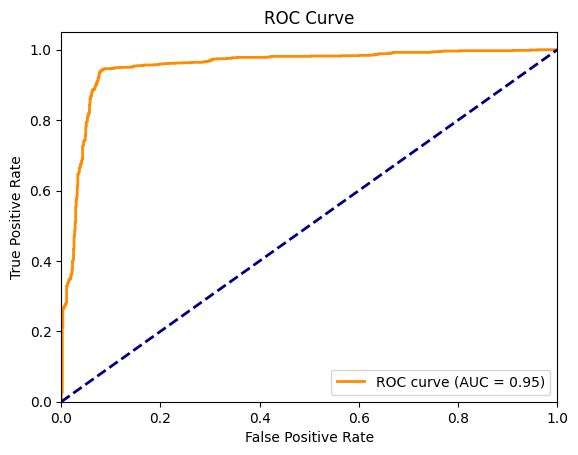

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test[:,1:2], test_outputs[:,-1,:])
roc_auc = roc_auc_score(y_test[:,1:2], test_outputs[:,-1,:])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [17]:
output_array = test_outputs[:,-1,:].numpy()
for i in range(len(output_array)):
    if output_array[i]>=0.5:
        output_array[i]=1
    else:
        output_array[i]=0
df = pd.DataFrame(output_array)
test_array=y_test[:,1:2].numpy()
df1=pd.DataFrame(test_array) 
combined_df = pd.concat([df, df1], axis=1)
combined_df.columns = ['test', 'real']
combined_df.to_excel('模型测试集结果.xlsx', index=False)
combined_df['equal'] = combined_df['test'] == combined_df['real']
accuracy = combined_df['equal'].mean()
print(f'准确率: {accuracy:.2%}')

准确率: 93.17%


1591 1591
Test Loss: 0.2389315515756607


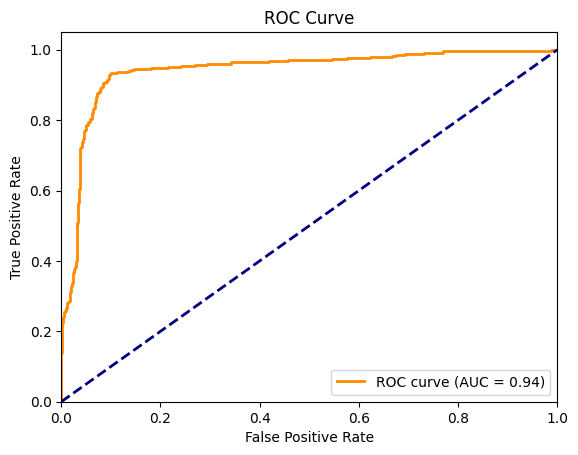

In [18]:
#验证
X_val, y_val = create_sequences(val_data, sequence_length)
print(len(X_val),len(y_val))
model.eval()
with torch.no_grad():
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs[:,-1,:], y_val[:,1:2])
    print(f"Test Loss: {test_loss.item()}")
    
fpr, tpr, thresholds = roc_curve(y_val[:,1:2], val_outputs[:,-1,:])
roc_auc = roc_auc_score(y_val[:,1:2], val_outputs[:,-1,:])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
output_array = val_outputs[:,-1,:].numpy()
for i in range(len(output_array)):
    if output_array[i]>=0.5:
        output_array[i]=1
    else:
        output_array[i]=0
df = pd.DataFrame(output_array)
test_array=y_val[:,1:2].numpy()
df1=pd.DataFrame(test_array) 
combined_df = pd.concat([df, df1], axis=1)
combined_df.columns = ['test', 'real']
combined_df.to_excel('模型验证集结果.xlsx', index=False)
combined_df['equal'] = combined_df['test'] == combined_df['real']
accuracy = combined_df['equal'].mean()
print(f'准确率: {accuracy:.2%}')

准确率: 91.70%


In [61]:
#验证集验证
data2 = pd.read_excel('/Users/luchong/Desktop/AI-Competition/datetime/dataset20231030-2.xlsx') 
#直接读取新的文件的9971行往后，预测9976行开始的p2
#excel行数从1开始，data从0开始，有个转换过程
data2=data2[9969:10269]
data2.head()

,DateTime,tag,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,time_idx,ID_mask
9969,2023-10-23 14:10:00,1,684.8,685.2,685.7,684.7,165953,31238,698.6,7.642837,8.902069,0,10,296,14,10,10793,False
9970,2023-10-23 14:20:00,1,685.2,685.8,686.0,685.2,167151,31191,698.6,6.069177,7.750332,0,10,296,14,20,10794,False
9971,2023-10-23 14:30:00,1,685.7,685.0,685.8,684.8,168279,31125,698.6,7.314513,7.562634,0,10,296,14,30,10795,False
9972,2023-10-23 14:40:00,1,684.9,685.0,685.0,683.6,169800,30993,698.6,10.532602,9.243568,0,10,296,14,40,10796,False
9973,2023-10-23 14:50:00,1,685.0,685.7,685.8,684.4,172121,30870,698.6,13.465131,41.981748,0,10,296,14,50,10797,False


In [63]:
p2_values=data2['p2'].values
p1_values=data2['p1'].values
p3_values=data2['p3'].values
p4_values=data2['p4'].values
p7_values=data2['p7'].values

In [64]:
data2['p2_change']=0
data2['p1_change']=0
data2['p3_change']=0
data2['p4_change']=0
data2['p7_change']=0
for i in range(1,len(p2_values)):
    if p2_values[i]>=p2_values[i-1]:
        data2.at[i+9969,'p2_change'] =1 #上升或不变置1
    else:
        data2.at[i+9969,'p2_change'] =0 #下降置0

for i in range(1,len(p1_values)):
    if p1_values[i]>=p1_values[i-1]:
        data2.at[i+9969,'p1_change'] =1 #上升或不变置1
    else:
        data2.at[i+9969,'p1_change'] =0 #下降置0
        
for i in range(1,len(p3_values)):
    if p3_values[i]>=p3_values[i-1]:
        data2.at[i+9969,'p3_change'] =1 #上升或不变置1
    else:
        data2.at[i+9969,'p3_change'] =0 #下降置0
        
for i in range(1,len(p4_values)):
    if p4_values[i]>=p4_values[i-1]:
        data2.at[i+9969,'p4_change'] =1 #上升或不变置1
    else:
        data2.at[i+9969,'p4_change'] =0 #下降置0
        
for i in range(1,len(p7_values)):
    if p7_values[i]>=p7_values[i-1]:
        data2.at[i+9969,'p7_change'] =1 #上升或不变置1
    else:
        data2.at[i+9969,'p7_change'] =0 #下降置0
data2.head()

,DateTime,tag,p1,p2,p3,p4,p5,p6,p7,p8,...,p12,p13,p14,time_idx,ID_mask,p2_change,p1_change,p3_change,p4_change,p7_change
9969,2023-10-23 14:10:00,1,684.8,685.2,685.7,684.7,165953,31238,698.6,7.642837,...,296,14,10,10793,False,0,0,0,0,0
9970,2023-10-23 14:20:00,1,685.2,685.8,686.0,685.2,167151,31191,698.6,6.069177,...,296,14,20,10794,False,1,1,1,1,1
9971,2023-10-23 14:30:00,1,685.7,685.0,685.8,684.8,168279,31125,698.6,7.314513,...,296,14,30,10795,False,0,1,0,0,1
9972,2023-10-23 14:40:00,1,684.9,685.0,685.0,683.6,169800,30993,698.6,10.532602,...,296,14,40,10796,False,1,0,0,0,1
9973,2023-10-23 14:50:00,1,685.0,685.7,685.8,684.4,172121,30870,698.6,13.465131,...,296,14,50,10797,False,1,1,1,1,1


In [65]:
X2_val,y2_val=create_sequences(data2, sequence_length)
print(len(X2_val),len(y2_val))

295 295


In [66]:
model.eval()
with torch.no_grad():
    val_outputs = model(X2_val)
    print(val_outputs.shape)
    test_loss = criterion(val_outputs[:,-1,:], y2_val[:,1:2])
    print(f"Test Loss: {test_loss.item()}")

torch.Size([295, 5, 1])
Test Loss: 0.23709721863269806


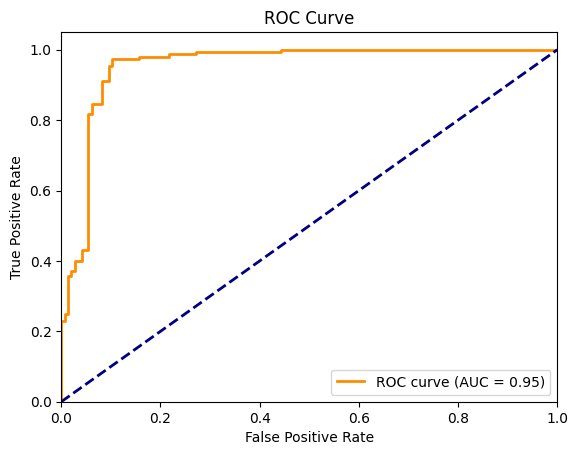

In [67]:
fpr, tpr, thresholds = roc_curve(y2_val[:,1:2], val_outputs[:,-1,:])
roc_auc = roc_auc_score(y2_val[:,1:2], val_outputs[:,-1,:])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [68]:
output_array = val_outputs[:,-1,:].numpy()
for i in range(len(output_array)):
    if output_array[i]>=0.5:
        output_array[i]=1
    else:
        output_array[i]=0
df = pd.DataFrame(output_array)
test_array=y2_val[:,1:2].numpy()
df1=pd.DataFrame(test_array) 
combined_df = pd.concat([df, df1], axis=1)
combined_df.columns = ['test', 'real']
combined_df.to_excel('模型10.23 14.10起预测结果.xlsx', index=False)
combined_df['equal'] = combined_df['test'] == combined_df['real']
accuracy = combined_df['equal'].mean()
print(f'准确率: {accuracy:.2%}')

准确率: 92.88%


In [71]:
torch.save(model, '/Users/luchong/Desktop/AI-Competition/datetime/model/lstm.pth')

In [72]:
#使用完全独立的方式进行验证
#数据处理
data3 = pd.read_excel('/Users/luchong/Desktop/AI-Competition/datetime/dataset20231030-2.xlsx') 
p2_values=data3['p2'].values
p1_values=data3['p1'].values
p3_values=data3['p3'].values
p4_values=data3['p4'].values
p7_values=data3['p7'].values

data3['p2_change']=0
for i in range(1,len(p2_values)):
    if p2_values[i]>=p2_values[i-1]:
        data3.at[i,'p2_change'] =1 #上升或不变置1
    else:
        data3.at[i,'p2_change'] =0 #下降置0

data3['p1_change']=0
for i in range(1,len(p1_values)):
    if p1_values[i]>=p1_values[i-1]:
        data3.at[i,'p1_change'] =1 #上升或不变置1
    else:
        data3.at[i,'p1_change'] =0 #下降置0
        
data3['p3_change']=0
for i in range(1,len(p3_values)):
    if p3_values[i]>=p3_values[i-1]:
        data3.at[i,'p3_change'] =1 #上升或不变置1
    else:
        data3.at[i,'p3_change'] =0 #下降置0
        
data3['p4_change']=0
for i in range(1,len(p4_values)):
    if p4_values[i]>=p4_values[i-1]:
        data3.at[i,'p4_change'] =1 #上升或不变置1
    else:
        data3.at[i,'p4_change'] =0 #下降置0
        
data3['p7_change']=0
for i in range(1,len(p7_values)):
    if p7_values[i]>=p7_values[i-1]:
        data3.at[i,'p7_change'] =1 #上升或不变置1
    else:
        data3.at[i,'p7_change'] =0 #下降置0
data3.head()  

,DateTime,tag,p1,p2,p3,p4,p5,p6,p7,p8,...,p12,p13,p14,time_idx,ID_mask,p2_change,p1_change,p3_change,p4_change,p7_change
0,2023-02-07 09:50:00,1,529.9,530.2,530.4,529.4,48231,27999,522.0,6.341414,...,38,9,50,0,False,0,0,0,0,0
1,2023-02-07 10:00:00,1,529.7,530.0,530.7,529.6,49170,27884,522.0,5.546019,...,38,10,0,1,False,0,0,1,1,1
2,2023-02-07 10:10:00,1,530.0,530.5,530.6,529.8,49445,27792,522.0,4.568553,...,38,10,10,2,False,1,1,0,1,1
3,2023-02-07 10:30:00,1,530.6,529.8,530.9,529.3,50148,27653,522.0,4.894341,...,38,10,30,4,False,0,1,1,0,1
4,2023-02-07 10:40:00,1,529.8,529.6,530.3,529.5,50547,27554,522.0,5.314777,...,38,10,40,5,False,0,0,0,1,1


准确率: 62.00%


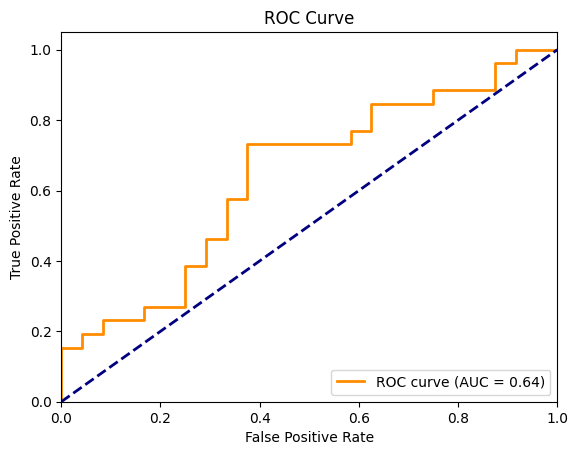

In [95]:
input_columns = ['p2_change', 'p1_change', 'p3_change', 'p4_change', 'p7_change']
output_columns = ['p2_change']
test_num = 0
right_num = 0
false_num = 0
predictions = []  # 存储预测概率
labels = []  # 存储真实标签

for i in range(9969, 10269, 6):
    if i + 5 <= 10269:
        input_data = data3[input_columns].iloc[i:i + 5].values
        label = data3[output_columns].iloc[i + 5].values

        input_tensor = torch.Tensor(input_data)
        model.eval()
        with torch.no_grad():
            output_data = model(input_tensor)
            res = output_data[-1:, -1].item()  # 获取单个预测概率值

        predictions.append(res)
        labels.append(label[0])

        test_num += 1
        if res >= 0.5:
            res = 1
        else:
            res = 0
        if res == label[0]:
            right_num += 1
        else:
            false_num += 1

accuracy = right_num / test_num
print(f'准确率: {accuracy:.2%}')

fpr, tpr, thresholds = roc_curve(labels, predictions)
roc_auc = roc_auc_score(labels, predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()